In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [12]:
BASE_DIR = "../data"
IMG_DIR = os.path.join(BASE_DIR, "images")
GT_DIR = os.path.join(BASE_DIR, "masks_gt")
PRED_DIR = os.path.join(BASE_DIR, "masks_pred")

for d in [IMG_DIR, GT_DIR, PRED_DIR]:
    os.makedirs(d, exist_ok=True)


In [13]:
#Generate Synthetic Medical Images
def generate_medical_image(size=256):
    img = np.zeros((size, size), dtype=np.uint8)

    # random ellipse (organ/lesion)
    center = (np.random.randint(60, 196), np.random.randint(60, 196))
    axes = (np.random.randint(30, 70), np.random.randint(30, 70))
    angle = np.random.randint(0, 180)

    cv2.ellipse(img, center, axes, angle, 0, 360, 180, -1)

    img = cv2.GaussianBlur(img, (15, 15), 0)
    noise = np.random.normal(0, 10, img.shape)

    return np.clip(img + noise, 0, 255).astype(np.uint8)


In [14]:
#Generate Ground Truth Mask
def generate_gt_mask(size=256):
    mask = np.zeros((size, size), dtype=np.uint8)

    center = (np.random.randint(60, 196), np.random.randint(60, 196))
    axes = (np.random.randint(30, 70), np.random.randint(30, 70))
    angle = np.random.randint(0, 180)

    cv2.ellipse(mask, center, axes, angle, 0, 360, 255, -1)
    return mask


In [15]:
#Save Dataset (50 samples)
NUM_SAMPLES = 50

for i in range(NUM_SAMPLES):
    img = generate_medical_image()
    mask = generate_gt_mask()

    cv2.imwrite(f"{IMG_DIR}/{i}.png", img)
    cv2.imwrite(f"{GT_DIR}/{i}.png", mask)


In [16]:
#Create Synthetic Segmentation Failures
def corrupt_mask(mask):
    corrupted = mask.copy()

    if np.random.rand() < 0.5:
        corrupted = cv2.erode(corrupted, None, iterations=3)

    if np.random.rand() < 0.5:
        corrupted = cv2.dilate(corrupted, None, iterations=4)

    if np.random.rand() < 0.3:
        shift_x, shift_y = np.random.randint(-20, 20), np.random.randint(-20, 20)
        corrupted = np.roll(corrupted, shift_x, axis=0)
        corrupted = np.roll(corrupted, shift_y, axis=1)

    if np.random.rand() < 0.3:
        noise = np.random.randint(0, 2, corrupted.shape) * 255
        corrupted = cv2.bitwise_xor(corrupted, noise.astype(np.uint8))

    return corrupted


In [18]:
#Generate Predicted Masks
for i in range(NUM_SAMPLES):
    gt = cv2.imread(f"{GT_DIR}/{i}.png", 0)
    pred = corrupt_mask(gt)
    cv2.imwrite(f"{PRED_DIR}/{i}.png", pred)


In [19]:
#Visualize Results 
def show_sample(idx):
    img = cv2.imread(f"{IMG_DIR}/{idx}.png", 0)
    gt = cv2.imread(f"{GT_DIR}/{idx}.png", 0)
    pred = cv2.imread(f"{PRED_DIR}/{idx}.png", 0)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Medical Image")

    ax[1].imshow(gt, cmap="gray")
    ax[1].set_title("Ground Truth Mask")

    ax[2].imshow(pred, cmap="gray")
    ax[2].set_title("Predicted (Corrupted) Mask")

    for a in ax:
        a.axis("off")
    plt.show()


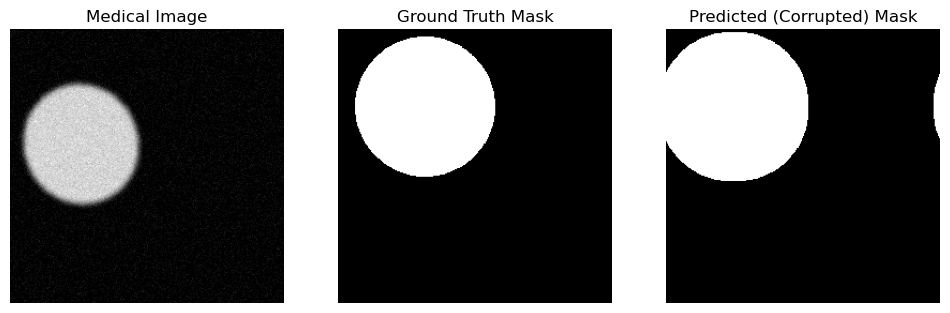

In [22]:
show_sample(3)

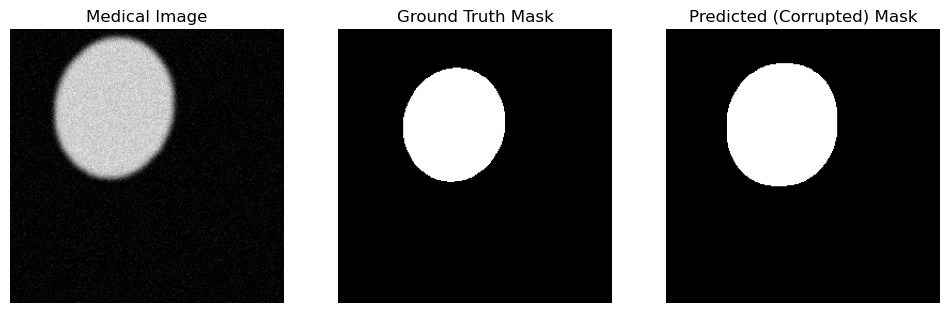

In [23]:
show_sample(12)

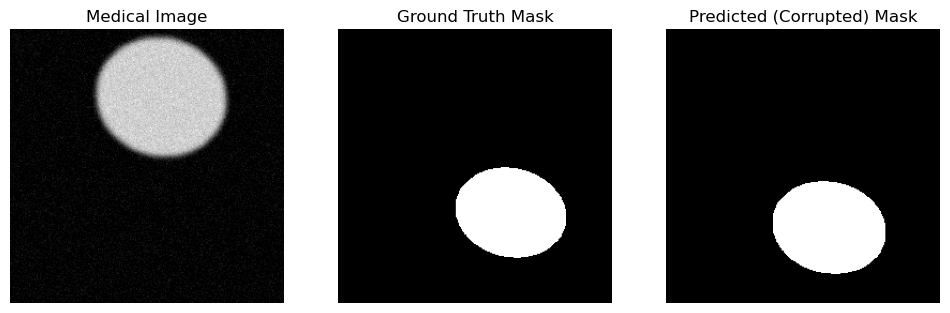

In [24]:
show_sample(25)